<a href="https://colab.research.google.com/github/Rafikul10/Tomato-Leaf-Classification-DL/blob/main/Tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#!nvidia-smi

In [4]:
#!pip install tensorflow-gpu

In [5]:
#import the libaries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import load_img
from keras.models import Sequential
import numpy as np
from glob import glob

In [6]:
#re-size all the iamge -
IMAGE_SIZE = [224,224]
train_path = '/content/drive/MyDrive/ColabNotebooks/Tomato/tomato_data/train'
test_path = '/content/drive/MyDrive/ColabNotebooks/Tomato/tomato_data/valid'

In [7]:
inception = InceptionV3(input_shape =IMAGE_SIZE +[3] , weights ="imagenet",include_top =False)

for layer in inception.layers:
  layer.trainable = False

folders = glob('/content/drive/MyDrive/ColabNotebooks/Tomato/tomato_data/train/*')  
folders


87910968/87910968 [==============================] - 18s 0us/step


['/content/drive/MyDrive/ColabNotebooks/Tomato/tomato_data/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/ColabNotebooks/Tomato/tomato_data/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/ColabNotebooks/Tomato/tomato_data/train/Tomato___Early_blight',
 '/content/drive/MyDrive/ColabNotebooks/Tomato/tomato_data/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/ColabNotebooks/Tomato/tomato_data/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/ColabNotebooks/Tomato/tomato_data/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/ColabNotebooks/Tomato/tomato_data/train/Tomato___Late_blight',
 '/content/drive/MyDrive/ColabNotebooks/Tomato/tomato_data/train/Tomato___healthy',
 '/content/drive/MyDrive/ColabNotebooks/Tomato/tomato_data/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/ColabNotebooks/Tomato/tomato_data/train/Tomato___Bacterial_spot']

In [8]:
x = Flatten()(inception.output)

#we can use sigmid if we have 2 categories for multiple categoris 
predicton = Dense(len(folders),activation='softmax')(x)

#create a model object
model = Model(inputs=inception.input, outputs = predicton)

#view the structre of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [9]:
#model to use cost and optimizer
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
#image data generator--
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   shear_range =0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )
test_datagen = ImageDataGenerator(rescale= 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ColabNotebooks/Tomato/tomato_data/train',
                                                 target_size =(224,224),
                                                 batch_size=16,
                                                 class_mode='categorical')
testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ColabNotebooks/Tomato/tomato_data/valid',
                                               target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')


Found 18365 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [12]:
from keras.applications.imagenet_utils import validate_activation
#fit the model
r = model.fit_generator(
    training_set,
    validation_data=testing_set,
    epochs=5,
    steps_per_epoch=100,
    validation_steps=100
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
100/100 [==============================] - 1015s 10s/step - loss: 7.7517 - accuracy: 0.4408 - val_loss: 3.2558 - val_accuracy: 0.6375
Epoch 2/5
100/100 [==============================] - 765s 8s/step - loss: 3.4424 - accuracy: 0.6112 - val_loss: 4.7390 - val_accuracy: 0.5944
Epoch 3/5
100/100 [==============================] - 629s 6s/step - loss: 4.0706 - accuracy: 0.6263 - val_loss: 3.2726 - val_accuracy: 0.6837
Epoch 4/5
100/100 [==============================] - 496s 5s/step - loss: 3.6319 - accuracy: 0.6850 - val_loss: 3.1206 - val_accuracy: 0.6862
Epoch 5/5
100/100 [==============================] - 426s 4s/step - loss: 4.5912 - accuracy: 0.6706 - val_loss: 3.4735 - val_accuracy: 0.7081


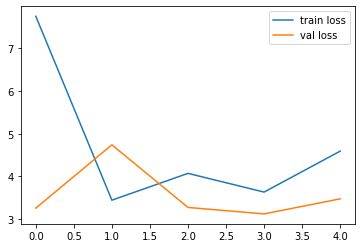

<Figure size 432x288 with 0 Axes>

In [13]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

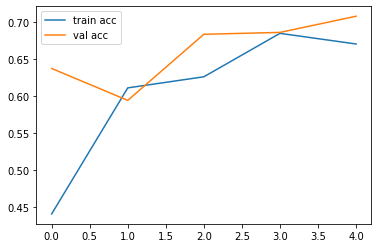

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file
from keras.models import load_model

model.save('tomato_clff_inception.h5')